In [356]:
#Import necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [357]:
#read csv file, set Geo areas as index, and set '--' as na_values

Gas = pd.read_csv('drynaturalgasconsumption19802009quadrillionbtu.csv', na_values='--', index_col=0)
Gas

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
North America,22.99389,22.52281,21.24996,20.11535,21.44691,20.94839,19.67609,20.72203,21.77161,22.98727,...,27.45426,28.42206,28.04075,28.02332,27.75657,27.90121,29.29893,29.45917,28.76674,29.84017
Bermuda,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Canada,1.91491,1.86417,1.90217,1.90034,2.05577,2.20417,2.16031,2.14368,2.37063,2.46086,...,3.19009,3.24322,3.45726,3.42450,3.49574,3.39607,3.51940,3.50256,3.20843,3.02674
Greenland,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Mexico,0.84352,0.91133,0.99157,0.99417,0.99753,1.04073,0.92441,0.93855,0.95259,0.92472,...,1.49161,1.62042,1.75285,1.68968,1.69941,2.28124,2.07754,2.16548,2.14732,2.14732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U.S. Pacific Islands,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Vanuatu,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Vietnam,0.00000,0.00036,0.00232,0.00232,0.00218,0.00145,0.00145,0.00145,0.00109,0.00109,...,0.04756,0.08269,0.09878,0.10976,0.14635,0.20854,0.21586,0.25537,0.25940,0.30037
Wake Island,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [358]:
#Check for duplicate values

Gas[Gas.index.duplicated()]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010


In [359]:
#Determine the number of columns
len(Gas.columns)

31

In [360]:
#Go through the countries available
indexes = Gas.index.unique()
indexes = indexes.tolist()
indexes
#you can use len(indexes) to confirm there are no duplicate values. the length of the list is 232, same as the original number of rows

['North America',
 'Bermuda',
 'Canada',
 'Greenland',
 'Mexico',
 'Saint Pierre and Miquelon',
 'United States',
 'Central & South America',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Bahamas, The',
 'Barbados',
 'Belize',
 'Bolivia',
 'Brazil',
 'Cayman Islands',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Falkland Islands (Islas Malvinas)',
 'French Guiana',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Honduras',
 'Jamaica',
 'Martinique',
 'Montserrat',
 'Netherlands Antilles',
 'Nicaragua',
 'Panama',
 'Paraguay',
 'Peru',
 'Puerto Rico',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent/Grenadines',
 'Suriname',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'Uruguay',
 'Venezuela',
 'Virgin Islands,  U.S.',
 'Virgin Islands, British',
 'Europe',
 'Albania',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Repub

**NOTE:**
From the list above, we can see some irregularities in some of the values. 
- Some countries have some values split between Cardinal points(e.g Germany has its values split with West and East Germany; same with Russia and Former USSR)
- Some countries have their old names written in brackets next to them (e.g Congo (Brazzaville), Congo (Kinshasa), etc)
- Some countries have commas in their names (e.g Gambia, The)
- Some countries have abbreviations in them..We'll check them out
These irregularities need to be removed to ensure consistency with new standards.

In [361]:
#Fill NaN as 0, so as to allow easy aggregate calculations

Gas.fillna(value=0, inplace=True)
Gas.head(15)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
North America,22.99389,22.52281,21.24996,20.11535,21.44691,20.94839,19.67609,20.72203,21.77161,22.98727,...,27.45426,28.42206,28.04075,28.02332,27.75657,27.90121,29.29893,29.45917,28.76674,29.84017
Bermuda,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Canada,1.91491,1.86417,1.90217,1.90034,2.05577,2.20417,2.16031,2.14368,2.37063,2.46086,...,3.19009,3.24322,3.45726,3.42450,3.49574,3.39607,3.51940,3.50256,3.20843,3.02674
Greenland,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Mexico,0.84352,0.91133,0.99157,0.99417,0.99753,1.04073,0.92441,0.93855,0.95259,0.92472,...,1.49161,1.62042,1.75285,1.68968,1.69941,2.28124,2.07754,2.16548,2.14732,2.14732
Saint Pierre and Miquelon,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
United States,20.23546,19.74731,18.35622,17.22084,18.39361,17.70348,16.59136,17.63980,18.44839,19.60169,...,22.77256,23.55842,22.83064,22.90914,22.56142,22.22390,23.70199,23.79113,23.41100,24.66611
Central & South America,1.38977,1.48129,1.58054,1.57959,1.88437,1.94045,1.97207,1.88586,2.01877,2.30458,...,3.83434,3.78130,3.95009,4.37171,4.49244,4.82154,4.63877,4.92770,4.64677,5.17488
Antarctica,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Antigua and Barbuda,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [362]:
#Let's check this Germany and Russia issues out

Gas[Gas.index.str.contains('Germany|Russia|U.S.S.R.')]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Germany,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.18110,3.15959,3.52304,3.49017,3.43319,3.48127,3.37976,3.44328,3.29233,3.43030
"Germany, East",0.19227,0.19422,0.19110,0.19344,0.22932,0.22620,0.23478,0.21645,0.23478,0.22932,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"Germany, West",1.88966,1.78932,1.63747,1.68809,1.77245,1.74581,1.76978,1.93406,1.87723,1.99534,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Former U.S.S.R.,13.86112,14.42556,15.50648,16.80518,19.10438,20.95166,22.08157,23.04625,24.71792,25.16631,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Russia,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,14.54176,14.69854,15.42902,16.16662,16.29846,16.74743,16.89709,16.95054,15.92811,17.94992


In [363]:
#We can correct this by summing both West Germany and East Germany into Germany; likewise for Russia
#Germany
Gas.loc['Germany'] += (Gas.loc['Germany, East'] + Gas.loc['Germany, West'])
Gas.drop(['Germany, East', 'Germany, West'], inplace=True)

#Russia
Gas.loc['Russia'] += Gas.loc['Former U.S.S.R.']
Gas.drop(['Former U.S.S.R.'], inplace=True)

In [364]:
#Confirm Germany ish has been sorted

Gas[Gas.index.str.contains('Germany|Russia|U.S.S.R.')]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Germany,2.08193,1.98354,1.82857,1.88153,2.00177,1.97201,2.00456,2.15051,2.11201,2.22466,...,3.18110,3.15959,3.52304,3.49017,3.43319,3.48127,3.37976,3.44328,3.29233,3.43030
Russia,13.86112,14.42556,15.50648,16.80518,19.10438,20.95166,22.08157,23.04625,24.71792,25.16631,...,14.54176,14.69854,15.42902,16.16662,16.29846,16.74743,16.89709,16.95054,15.92811,17.94992


**Next we move to countries with commas in them**

In [365]:
Gas[Gas.index.str.contains('[,]')]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
"Bahamas, The",0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
"Virgin Islands, U.S.",0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
"Virgin Islands, British",0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
"Gambia, The",0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
"Korea, North",0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
"Korea, South",0.0,0.0,0.0,0.0,0.0,0.0,0.00281,0.08358,0.10798,0.10451,...,0.8065,0.92496,0.96379,1.13218,1.20437,1.28741,1.3908,1.41469,1.35992,1.69638


In [366]:
#We can correct this with the following lines of code
Gas.rename(index={'Bahamas, The': 'The Bahamas'}, inplace=True)
Gas.rename(index={'Virgin Islands, British': 'British Virgin Islands'}, inplace=True)
Gas.rename(index={'Virgin Islands, U.S.': 'U.S. Virgin Islands'}, inplace=True)
Gas.rename(index={'Gambia, The': 'Gambia'}, inplace=True)
Gas.rename(index={'Korea, North': 'North Korea'}, inplace=True)
Gas.rename(index={'Korea, South': 'South Korea'}, inplace=True)

In [367]:
#Let's confirm it worked..check for korea
Gas[Gas.index.str.contains('korea', flags=re.I, regex=True)]
#flags=re.I is asking pandas to ignore case

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
North Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.00281,0.08358,0.10798,0.10451,...,0.8065,0.92496,0.96379,1.13218,1.20437,1.28741,1.3908,1.41469,1.35992,1.69638


**Next we look at contries with bracketed companions**

In [368]:
Gas[Gas.index.str.contains('[a-z].*[)]$')]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Falkland Islands (Islas Malvinas),0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Congo (Brazzaville),0.00042,0.00063,0.00063,0.00073,0.00073,0.00209,0.00042,0.00209,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.00444,0.00666,0.00666,0.01368,0.01960,0.03439
Congo (Kinshasa),0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Cote dIvoire (IvoryCoast),0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.04992,0.04737,0.04737,0.04596,0.04596,0.04596,0.05303,0.05656,0.05656,0.05656
Burma (Myanmar),0.01152,0.01256,0.01665,0.01958,0.02408,0.02932,0.03979,0.04209,0.03845,0.0403,...,0.06188,0.08189,0.09343,0.09938,0.15410,0.13474,0.15335,0.14330,0.12097,0.12246
Timor-Leste (East Timor),0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**We can also rename them as we've done above; however, we will only focus on African countries and some popular countries due to limited knowledge of locations**

In [369]:
#correction for Congo. Let's sum up the two sets of Congos showing, drop one and rename the other to DR Congo.
#sum
Gas.loc['Congo (Brazzaville)'] += Gas.loc['Congo (Kinshasa)']
#renaming
Gas.rename(index={'Congo (Brazzaville)': 'DR Congo'}, inplace=True)
#drop row
Gas.drop(['Congo (Kinshasa)'], inplace=True)
#check to confirm it worked
Gas[Gas.index.str.contains('congo', flags=re.I, regex=True)]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
DR Congo,0.00042,0.00063,0.00063,0.00073,0.00073,0.00209,0.00042,0.00209,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00444,0.00666,0.00666,0.01368,0.0196,0.03439


In [370]:
#rename Cote d'ivoire
Gas.rename(index={'Cote dIvoire (IvoryCoast)': "Côte d'Ivoire"}, inplace=True)

**Next we look at countries with cardinals**

In [371]:
Gas[Gas.index.str.contains('west|east|south|north', flags=re.I, regex=True)]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
North America,22.99389,22.52281,21.24996,20.11535,21.44691,20.94839,19.67609,20.72203,21.77161,22.98727,...,27.45426,28.42206,28.04075,28.02332,27.75657,27.90121,29.29893,29.45917,28.76674,29.84017
Central & South America,1.38977,1.48129,1.58054,1.57959,1.88437,1.94045,1.97207,1.88586,2.01877,2.30458,...,3.83434,3.78130,3.95009,4.37171,4.49244,4.82154,4.63877,4.92770,4.64677,5.17488
Middle East,1.37322,1.36163,1.27208,1.49705,1.99385,2.38480,2.65129,3.06968,3.43600,3.75486,...,7.38901,8.04721,8.39318,9.03441,10.31850,10.77963,11.20972,12.24792,13.13117,13.91024
South Africa,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.07765,0.08504,0.08430,0.08245,0.08134,0.15529,0.21815,0.18487,0.13274,0.14827
Western Sahara,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
North Korea,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
South Korea,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00281,0.08358,0.10798,0.10451,...,0.80650,0.92496,0.96379,1.13218,1.20437,1.28741,1.39080,1.41469,1.35992,1.69638
Timor-Leste (East Timor),0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**They are well formatted so lets proceed to those with abbreviations and '&' symbol**

In [372]:
Gas[Gas.index.str.contains('[A-Z][.][A-Z].*')]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
"Virgin Islands, U.S.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U.S. Pacific Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**NOTE: These checks are just to practice basic regex I recently got to understand. From the above everything looks good so lets proceed**

**A lot of the countries in the dataframe have zero values and many have shorter data entries than the other. We need to drop these countries, to do this, we create a new column that sums up all the years, set min count to above average of len of column(31) and remove sums = 0. To do this, we need to convert the zero values to NaN values, so we can set the skipna=True, and also allow the sum func's min_count parameter to work efficiently**

In [373]:
#Replace 0 with NaN
Gas.replace(to_replace=0, value=np.nan, inplace=True)
#performing summation
Gas['contotal'] = Gas.sum(axis=1, skipna=True, min_count=25)
#fillna with zero
Gas.fillna(value=0, inplace=True)
#dropping countries with 0 contotal
Gas.drop(Gas[Gas['contotal'] == 0].index, inplace=True)
Gas.shape

(79, 32)

In [374]:
#Remaining countries
indexx = Gas.index.unique()
indexx = indexx.tolist()
indexx

['North America',
 'Canada',
 'Mexico',
 'United States',
 'Central & South America',
 'Argentina',
 'Barbados',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Cuba',
 'Ecuador',
 'Peru',
 'Trinidad and Tobago',
 'Venezuela',
 'Europe',
 'Albania',
 'Austria',
 'Belgium',
 'Bulgaria',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Poland',
 'Romania',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'Eurasia',
 'Russia',
 'Middle East',
 'Bahrain',
 'Iran',
 'Iraq',
 'Israel',
 'Kuwait',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'Syria',
 'United Arab Emirates',
 'Africa',
 'Algeria',
 'Angola',
 'Egypt',
 'Gabon',
 'Libya',
 'Morocco',
 'Nigeria',
 'Tunisia',
 'Asia & Oceania',
 'Afghanistan',
 'Australia',
 'Bangladesh',
 'Brunei',
 'Burma (Myanmar)',
 'China',
 'India',
 'Indonesia',
 'Japan',
 'South Korea',
 'Malaysia',
 'New Zealand',
 'Pakistan',
 'Taiwan',
 'Thailand',
 'Viet

## Africa

In [375]:
#Copy list of African countries from google and extract into a list

In [376]:
"""
Nigeria
Ethiopia
Egypt
DR Congo
Tanzania
South Africa
Kenya
Uganda
Algeria
Sudan
Morocco
Angola
Mozambique
Ghana
Madagascar
Cameroon
Côte d'Ivoire
Ivory Coast
Niger
Burkina Faso
Mali
Malawi
Zambia
Senegal
Chad
Somalia
Zimbabwe
Guinea
Rwanda
Benin
Burundi
Tunisia
South Sudan
Togo
Sierra Leone
Libya
Congo
Liberia
Central African Republic
Mauritania
Eritrea
Namibia
Gambia
Botswana
Gabon
Lesotho
Guinea-Bissau
Equatorial Guinea
Mauritius
Eswatini
Djibouti
Comoros
Cape Verde
Cabo Verde
Sao Tome and Principe
Seychelles
"""

"\nNigeria\nEthiopia\nEgypt\nDR Congo\nTanzania\nSouth Africa\nKenya\nUganda\nAlgeria\nSudan\nMorocco\nAngola\nMozambique\nGhana\nMadagascar\nCameroon\nCôte d'Ivoire\nIvory Coast\nNiger\nBurkina Faso\nMali\nMalawi\nZambia\nSenegal\nChad\nSomalia\nZimbabwe\nGuinea\nRwanda\nBenin\nBurundi\nTunisia\nSouth Sudan\nTogo\nSierra Leone\nLibya\nCongo\nLiberia\nCentral African Republic\nMauritania\nEritrea\nNamibia\nGambia\nBotswana\nGabon\nLesotho\nGuinea-Bissau\nEquatorial Guinea\nMauritius\nEswatini\nDjibouti\nComoros\nCape Verde\nCabo Verde\nSao Tome and Principe\nSeychelles\n"

In [377]:
#copy the output of the cell above and remove the newlines to the left and right
africa = "Nigeria\nEthiopia\nEgypt\nDR Congo\nTanzania\nSouth Africa\nKenya\nUganda\nAlgeria\nSudan\nMorocco\nAngola\nMozambique\nGhana\nMadagascar\nCameroon\nCôte d'Ivoire\nNiger\nBurkina Faso\nMali\nMalawi\nZambia\nSenegal\nChad\nSomalia\nZimbabwe\nGuinea\nRwanda\nBenin\nBurundi\nTunisia\nSouth Sudan\nTogo\nSierra Leone\nLibya\nCongo\nLiberia\nCentral African Republic\nMauritania\nEritrea\nNamibia\nGambia\nBotswana\nGabon\nLesotho\nGuinea-Bissau\nEquatorial Guinea\nMauritius\nEswatini\nDjibouti\nComoros\nCabo Verde\nSao Tome & Principe\nSeychelles"
afric = africa.split('\n')
afric

['Nigeria',
 'Ethiopia',
 'Egypt',
 'DR Congo',
 'Tanzania',
 'South Africa',
 'Kenya',
 'Uganda',
 'Algeria',
 'Sudan',
 'Morocco',
 'Angola',
 'Mozambique',
 'Ghana',
 'Madagascar',
 'Cameroon',
 "Côte d'Ivoire",
 'Niger',
 'Burkina Faso',
 'Mali',
 'Malawi',
 'Zambia',
 'Senegal',
 'Chad',
 'Somalia',
 'Zimbabwe',
 'Guinea',
 'Rwanda',
 'Benin',
 'Burundi',
 'Tunisia',
 'South Sudan',
 'Togo',
 'Sierra Leone',
 'Libya',
 'Congo',
 'Liberia',
 'Central African Republic',
 'Mauritania',
 'Eritrea',
 'Namibia',
 'Gambia',
 'Botswana',
 'Gabon',
 'Lesotho',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Mauritius',
 'Eswatini',
 'Djibouti',
 'Comoros',
 'Cabo Verde',
 'Sao Tome & Principe',
 'Seychelles']

**Now let's see how many african countries are left in our trimmed data**

In [378]:
africa = Gas[Gas.index.isin(afric)]
africa

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,contotal
Algeria,0.54280,0.40828,0.65254,0.77408,0.80240,0.68912,0.71036,0.77377,0.84051,0.77922,...,0.81232,0.81670,0.76734,0.95381,1.01888,1.05299,1.10147,1.14449,1.14704,25.80183
Angola,0.00961,0.00925,0.01047,0.01298,0.01256,0.01361,0.01466,0.01665,0.01849,0.01590,...,0.02292,0.02403,0.02773,0.02403,0.02514,0.03069,0.02514,0.02551,0.02710,0.61364
Egypt,0.03141,0.05235,0.09842,0.11873,0.14972,0.18323,0.20940,0.23222,0.25585,0.28618,...,0.92437,1.09519,1.16323,1.26491,1.04639,1.13258,1.55479,1.64057,1.70676,19.09703
Gabon,0.00259,0.00222,0.00209,0.00555,0.00555,0.00209,0.00105,0.00429,0.00370,0.00333,...,0.00333,0.00333,0.00370,0.00370,0.00370,0.00296,0.00296,0.00296,0.00296,0.10444
Libya,0.18846,0.11517,0.09214,0.11726,0.12773,0.14972,0.17590,0.16830,0.16417,0.17250,...,0.20632,0.17563,0.21926,0.21556,0.17360,0.19671,0.20336,0.22222,0.25306,5.56708
Morocco,0.00259,0.00333,0.00314,0.00335,0.00209,0.00314,0.00314,0.00220,0.00222,0.00222,...,0.00185,0.00185,0.00185,0.00185,0.00222,0.00133,0.02071,0.02071,0.02108,0.11824
Nigeria,0.03957,0.07957,0.05235,0.08502,0.10156,0.11308,0.12145,0.13684,0.13940,0.17378,...,0.23516,0.31466,0.34461,0.38306,0.40376,0.39193,0.45387,0.15345,0.18376,6.29235
Tunisia,0.01571,0.01724,0.02225,0.02472,0.04326,0.05191,0.04820,0.05585,0.04845,0.06854,...,0.15500,0.14895,0.14935,0.17357,0.15339,0.13926,0.17640,0.12352,0.13240,2.80747


## DATA VISUALIZATIONS

Text(0, 0.5, 'Countries')

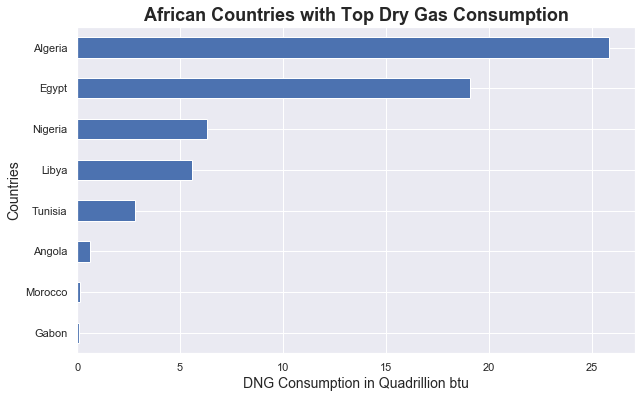

In [379]:
total = africa.contotal.sort_values()
sns.set()
total.plot(kind='barh', figsize=(10,6))
plt.title('African Countries with Top Dry Gas Consumption', fontsize=18, fontweight='bold')
plt.xlabel('DNG Consumption in Quadrillion btu', fontsize=14)
plt.ylabel('Countries', fontsize=14)

From the plot above, we can see that Algeria takes the lead on overall Dry Gas consumption compared to other African countries in the data set. However, an in-depth look into the movement of consumption can provide us more like if indeed Algeria is currently leading consumer of Dry Gas or how consumption has increased or decreased over the years for all countries.

Let's take an in depth look at the countries. We will drop the contotal column, transpose the dataframe, and plot line graphs of africa.

In [380]:
#drop contotal
africa.drop(columns='contotal', inplace=True)

In [381]:
#transpose the dataframe
africaTrans = africa.T
africaTrans

,Algeria,Angola,Egypt,Gabon,Libya,Morocco,Nigeria,Tunisia
1980,0.54280,0.00961,0.03141,0.00259,0.18846,0.00259,0.03957,0.01571
1981,0.40828,0.00925,0.05235,0.00222,0.11517,0.00333,0.07957,0.01724
1982,0.65254,0.01047,0.09842,0.00209,0.09214,0.00314,0.05235,0.02225
1983,0.77408,0.01298,0.11873,0.00555,0.11726,0.00335,0.08502,0.02472
1984,0.80240,0.01256,0.14972,0.00555,0.12773,0.00209,0.10156,0.04326
1985,0.68912,0.01361,0.18323,0.00209,0.14972,0.00314,0.11308,0.05191
1986,0.71036,0.01466,0.20940,0.00105,0.17590,0.00314,0.12145,0.04820
1987,0.77377,0.01665,0.23222,0.00429,0.16830,0.00220,0.13684,0.05585
1988,0.84051,0.01849,0.25585,0.00370,0.16417,0.00222,0.13940,0.04845
1989,0.77922,0.01590,0.28618,0.00333,0.17250,0.00222,0.17378,0.06854


In [382]:
africaTrans.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010'],
      dtype='object')

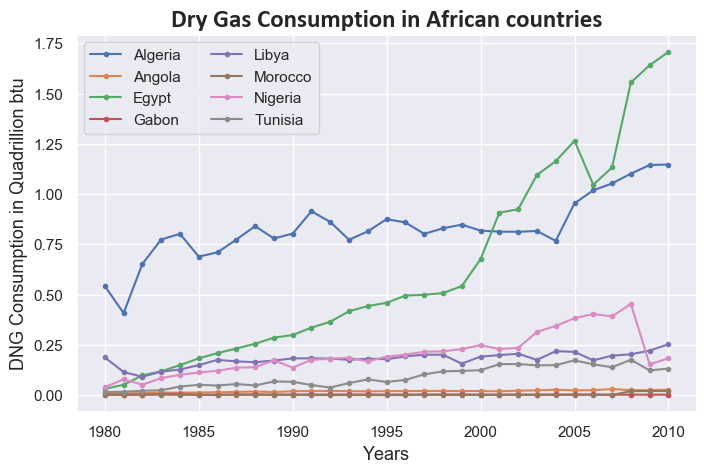

In [383]:
#PLOT
plt.figure(figsize=(8,5), dpi=100)

for country in africaTrans:
    plt.plot(africaTrans[country], label=country, marker='.')

plt.xlabel('Years', fontsize=13)
plt.ylabel('DNG Consumption in Quadrillion btu', fontsize=13)
plt.xticks(africaTrans.index[::5])
plt.title('Dry Gas Consumption in African countries', fontsize=18, fontname='Calibri', fontweight='bold')
plt.legend(ncol=2)

From the above plot we have access to more information. We can see that although Algeria has the highest overall Dry Gas consumption over the years, Egypt has overtaken Algeria as the most recent largest consumer of Dry Gas in Africa. Nigeria experienced a gradual increase in consumption up until 2008 before falling drastically in 2009, making it the 4th largest consumer coming after 3rd placed Libya who has experienced a steady increment in consumption. Tunisia comes fifth and the rest of the countries didn't experience much increment over the years.

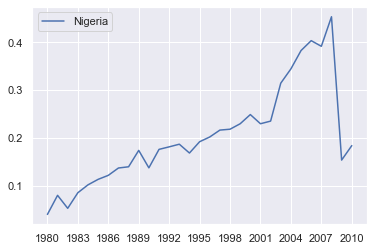

In [386]:
plt.plot(africaTrans.Nigeria, label='Nigeria')
plt.legend()
plt.xticks(africaTrans.index[::3])
plt.show()

Knowledge garnered from DPR Annual Oil and Gas Report shows that the reason behind the drastic drop in consumption in 2009, is that the amount of gas flared and produced in Nigeria dropped in 2009, making domestic sales drop as well.

**We've come to the end of this notebook. It is important to note that this ipynb was used as a revision, still, we derived meaningful insights from the datasets (more visualizations/insights could have been unlocked). Some of the syntax used in this notebook have been introduced in my previous uploads under Introduction to Data science. I hope you learnt someting from this. Thanks..**